In [114]:
import cptac
import scipy
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import statistics
import parse_correlations_dataframe as get_corr
import copy

In [2]:
cptac.download("endometrial")

en = cptac.Endometrial()

# Beta-catenin in Endometrial Notebook

The purpose of this notebook is to compare mutated CTNNB1 genes with non mutated genes in cancer cells.

In [7]:
beta_corr = get_corr.get_data(cancer_type=["endometrial"], tissue_type=["tumor"], genes = ["CTNNB1"], get_corr=True, get_r2=True, get_p=True)
corr = list(beta_corr["Correlation"])[0]
corr 

0.29272750009956416

In [11]:
trans_prot = en.join_omics_to_omics(df1_name='proteomics', df2_name='transcriptomics')

cptac warning: transcriptomics data was not found for the following samples, so transcriptomics data columns were filled with NaN for these samples: C3L-00563.N, C3L-00605.N, C3L-00769.N, C3L-00770.N, C3L-00771.N, C3L-00930.N, C3L-00947.N, C3L-00963.N, C3L-01246.N, C3L-01249.N, C3L-01252.N, C3L-01256.N, C3L-01257.N, C3L-01744.N, C3N-00200.N, C3N-00729.N, C3N-01211.N, NX1.N, NX10.N, NX11.N, NX12.N, NX13.N, NX14.N, NX15.N, NX16.N, NX17.N, NX18.N, NX2.N, NX3.N, NX4.N, NX5.N, NX6.N, NX7.N, NX8.N, NX9.N (<ipython-input-11-be6fcf8102c9>, line 1)


In [47]:
beta_multi = en.multi_join({'proteomics': 'CTNNB1', 'transcriptomics':'CTNNB1', 'somatic_mutation' : 'CTNNB1'}, tissue_type = "tumor")


In [48]:
catenin = []
for index, i in enumerate(beta_multi["CTNNB1_Location"]):
    if (type(i) == list):
        if(len(i) == 1):
            if (i[0][3] == '3') and (i[0][4] == '3'):
                catenin.append(index)
            if ((i[0][3] == '3') and (i[0][4] == '7')):
                catenin.append(index)
            if ((i[0][3] == '3') and (i[0][4] == '2')):
                catenin.append(index)
            if ((i[0][3] == '3') and (i[0][4] == '4')):
                catenin.append(index)
            if ((i[0][3] == '4') and (i[0][4] == '1')):
                catenin.append(index)
            if ((i[0][3] == '4') and (i[0][4] == '5')):
                catenin.append(index)
        if (len(i) > 1):
            for j in i:
                if (j[3] == '3') and (j[4] == '3'):
                    catenin.append(index)
                    break
                if ((j[3] == '3') and (j[4] == '7')):
                    catenin.append(index)
                    break
                if ((j[3] == '3') and (j[4] == '2')):
                    catenin.append(index)
                    break
                if ((j[3] == '3') and (j[4] == '4')):
                    catenin.append(index)
                    break
                if ((j[3] == '4') and (j[4] == '1')):
                    catenin.append(index)
                    break
                if ((j[3] == '4') and (j[4] == '5')):
                    catenin.append(index)
                    break

In [49]:
trans_col = list(beta_multi['CTNNB1_transcriptomics'])
prot_col = list(beta_multi['CTNNB1_proteomics'])
label_col = []
index_col = []
for i in range(len(trans_col)):
    if i in catenin:
        label_col.append("Mutation")
    else:
        label_col.append("Wild_type")
    index_col.append(i)
    

In [88]:
beta_df = pd.DataFrame({"Label" : label_col, "Proteomics" : prot_col, "Transcriptomics" : trans_col })

In [87]:
is_mutation = beta_df['Label'] == 'Mutation'
is_wild_type = beta_df['Label'] == 'Wild_type'

In [103]:
#beta-catenin and wild type statistical values
beta_correlation,beta_pval = scipy.stats.pearsonr(beta_df[is_mutation]['Proteomics'], beta_df[is_mutation]['Transcriptomics'])
wildT_correlation,wildT_pval = scipy.stats.pearsonr(beta_df[is_wild_type]['Proteomics'], beta_df[is_wild_type]['Transcriptomics'])
beta_slope, beta_intercept, beta_r_value, beta_p_value, beta_std_err = stats.linregress(beta_df[is_mutation]['Proteomics'], beta_df[is_mutation]['Transcriptomics'])
wildT_slope, wildT_intercept, wildT_r_value, wildT_p_value, wildT_std_err = stats.linregress(beta_df[is_wild_type]['Proteomics'], beta_df[is_wild_type]['Transcriptomics'])
beta_r_sqrd = beta_r_value ** 2
wildT_r_sqrd = wildT_r_value ** 2
r2_delta = beta_r_sqrd - wildT_r_sqrd
print("Beta catenin correlation: " + str(beta_correlation))
print("Wild type correlation: " + str(wildT_correlation))
print("Beta catenin R2: " + str(beta_r_sqrd))
print("Wild type R2: " + str(wildT_r_sqrd))
print("R2 Delta : " + str(r2_delta))



Beta catenin correlation: 0.34082338655621236
Wild type correlation: 0.09952847794832899
Beta catenin R2: 0.11616058082364539
Wild type R2: 0.009905917922710991
R2 Delta : 0.1062546629009344


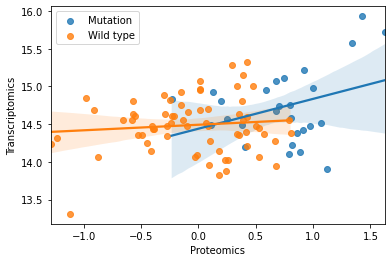

In [86]:
ax = sns.regplot( x = 'Proteomics', y= 'Transcriptomics',  data = beta_df[is_mutation], label = "Mutation")
ax = sns.regplot( x = 'Proteomics', y= 'Transcriptomics',  data = beta_df[is_wild_type], label = "Wild type")
ax.legend(loc="best")
plt.show()

In [112]:
beta_df['Label']

0     Wild_type
1     Wild_type
2     Wild_type
3     Wild_type
4     Wild_type
        ...    
90    Wild_type
91    Wild_type
92    Wild_type
93    Wild_type
94    Wild_type
Name: Label, Length: 95, dtype: object

In [111]:
counter = 0
for i in np.random.permutation(beta_df['Label']):
    if i == "Mutation":
        counter += 1
counter

27

In [115]:
permu_df = copy.deepcopy(beta_df)

In [124]:
permu_df['Label'] = np.random.permutation(permu_df['Label'])

In [134]:
permutation_list = []
for i in range(10000):
    permu_df['Label'] = np.random.permutation(permu_df['Label'])
    permu_is_mutation = permu_df['Label'] == 'Mutation'
    permu_is_wild_type = permu_df['Label'] == 'Wild_type'
    beta_slope, beta_intercept, beta_r_value, beta_p_value, beta_std_err = stats.linregress(permu_df[permu_is_mutation]['Proteomics'], permu_df[permu_is_mutation]['Transcriptomics'])
    wildT_slope, wildT_intercept, wildT_r_value, wildT_p_value, wildT_std_err = stats.linregress(permu_df[permu_is_wild_type]['Proteomics'], permu_df[permu_is_wild_type]['Transcriptomics'])
    permu_beta_r2 = beta_r_value ** 2
    permu_wildT_r2 = wildT_r_value ** 2
    delta = permu_beta_r2 - permu_wildT_r2
    permutation_list.append(delta)
    

In [135]:
permutation_list

[-0.012651225224260418,
 -0.1055446443425534,
 0.12956562433886304,
 -0.11673658896742152,
 -0.03939585522143033,
 0.22634246889823606,
 -0.007952213599808036,
 0.08470186566250533,
 -0.065627111021927,
 0.05273052500713822,
 0.06867000737813554,
 0.10621509371998514,
 -0.0314708831295203,
 -0.10959104021866764,
 -0.12150283754458038,
 0.27433847715183446,
 0.167746108071582,
 -0.15047875161116472,
 0.15952151567810244,
 -0.023478831912146364,
 -0.09553347057828966,
 -0.07400915195302371,
 -0.0881080196277057,
 -0.14129178226446507,
 -0.038099787777221776,
 0.2148671380898854,
 0.11973338806562323,
 0.1411872213817703,
 0.060681906620713544,
 0.3103069395690327,
 0.2345914468336142,
 -0.1599394525923902,
 0.09565746089530719,
 -0.09656841386737747,
 0.40898385218321975,
 0.10249576210290376,
 -0.022843176768659657,
 -0.04666577102859154,
 -0.04446815490750924,
 -0.03500511495907916,
 0.43634646096575125,
 -0.14797707744627128,
 0.136094130187002,
 0.1941940564392025,
 -0.08233931315625

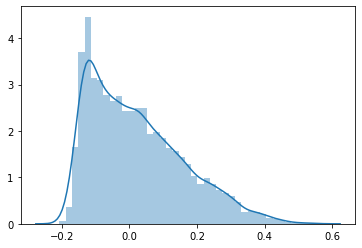

In [136]:
sns.distplot(permutation_list)